## Objective
- Predict if a customer is happy or not based on the answers they give to questions asked.

## Data
- Y: target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1: my order was delivered on time with values indicating 1 (bad) to 5 (Excellent)
- X2: contents of my order was as I expected with values indicating 1 (bad) to 5 (Excellent)
- X3: I ordered everything I wanted to order with values indicating 1 (bad) to 5 (Excellent)
- X4: I paid a good price for my order with values indicating 1 (bad) to 5 (Excellent)
- X5: I am satisfied with my courier with values indicating 1 (bad) to 5 (Excellent)
- X6: the app makes ordering easy for me with values indicating 1 (bad) to 5 (Excellent)

## Import Libraries

In [207]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.preprocessing import FunctionTransformer
# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import lime
import lime.lime_tabular

from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

import shap
shap.initjs()


### Read Dataset

In [2]:
ACME_data = pd.read_csv("ACME-HappinessSurvey2020.csv")
df = ACME_data.copy()

### View Dataset

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


### Understanding Shape

In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 126 rows and 7 columns.


- Low volume of data may pose an issue for train/test splitting

### Checking data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


- Categorical variables classified as int because they are ratings. This needs to be changed.
- No null values in the data

### Fixing data type

In [7]:
categorical_var = ['Y','X1','X2','X3','X4','X5','X6']
for colname in categorical_var:
    df[colname] = df[colname].astype('category')

#checking if properly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       126 non-null    category
 1   X1      126 non-null    category
 2   X2      126 non-null    category
 3   X3      126 non-null    category
 4   X4      126 non-null    category
 5   X5      126 non-null    category
 6   X6      126 non-null    category
dtypes: category(7)
memory usage: 2.3 KB


### Categorical Data Value check

In [8]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

1    69
0    57
Name: Y, dtype: int64



5    65
4    40
3    20
1     1
Name: X1, dtype: int64



3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64



3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64



4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64



4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64



5    57
4    47
3    20
1     1
2     1
Name: X6, dtype: int64





- Entries within the columns are in line with what is expected

### Dataset Summary

In [9]:
df.describe(include=["category"])

,Y,X1,X2,X3,X4,X5,X6
count,126,126,126,126,126,126,126
unique,2,4,5,5,5,5,5
top,1,5,3,3,4,4,5
freq,69,65,42,55,53,50,57


## EDA

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Column Y

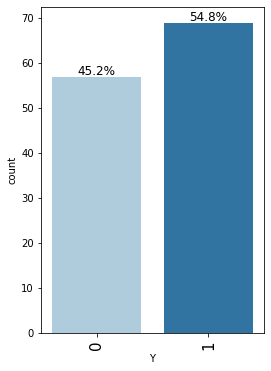

In [11]:
labeled_barplot(df, "Y", perc=True)

- Most customers (54.8%) are happy 

### Column X1

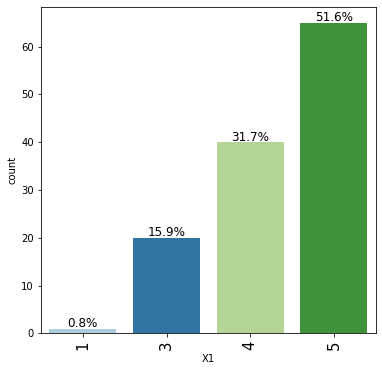

In [12]:
labeled_barplot(df, "X1", perc=True)

- Most customers had their orders delivered on time/are happy with the delivery time of their order

### Column X2

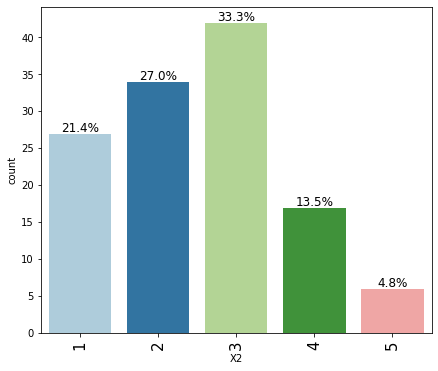

In [13]:
labeled_barplot(df, "X2", perc=True)

- Customers tend to be unhappy with the contents of their orders with 48.4% rating either a 1 or 2

### Column X3

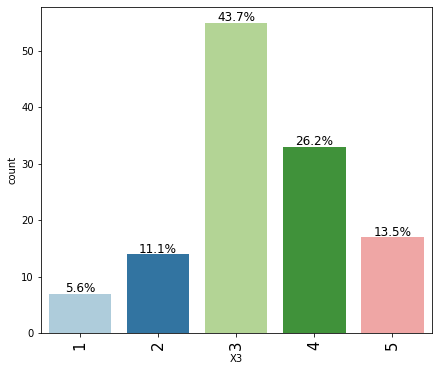

In [14]:
labeled_barplot(df, "X3", perc=True)

- Most customers ordered what they wanted with 39.7% rating a 4 or 5

### Column X4

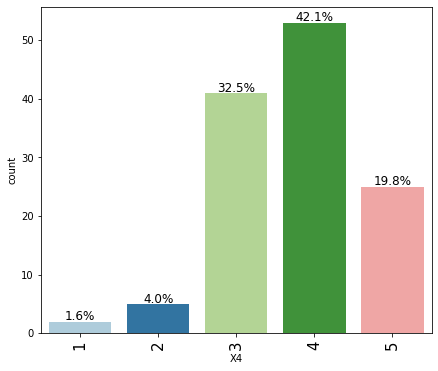

In [15]:
labeled_barplot(df, "X4", perc=True)

- Most customers are happy with the price of what they ordered with 61.9% rating a 4 or a 5

### Column X5

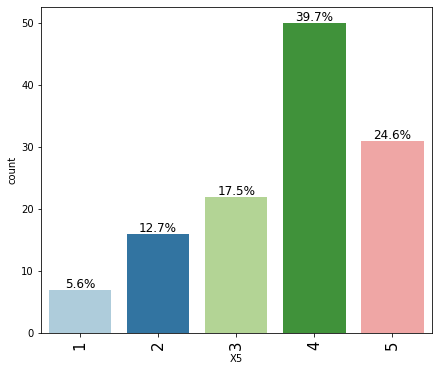

In [16]:
labeled_barplot(df, "X5", perc=True)

- Most customers are happy with their courier with 64.3% rating a 4 or a 5

### Column X6

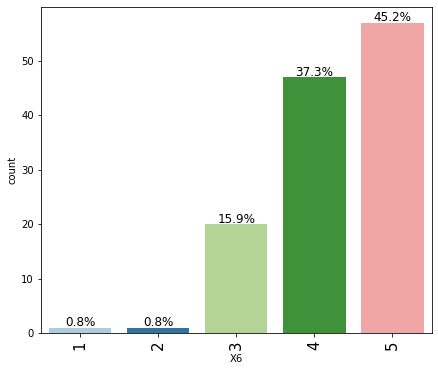

In [17]:
labeled_barplot(df, "X6", perc=True)

- Most customers are happy with how easy the app is to use with 82.5% rating a 4 or a 5.

## Bivariate Analysis

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Distribution of Y in X1

Y     0   1  All
X1              
All  57  69  126
4    24  16   40
5    20  45   65
3    12   8   20
1     1   0    1
------------------------------------------------------------------------------------------------------------------------


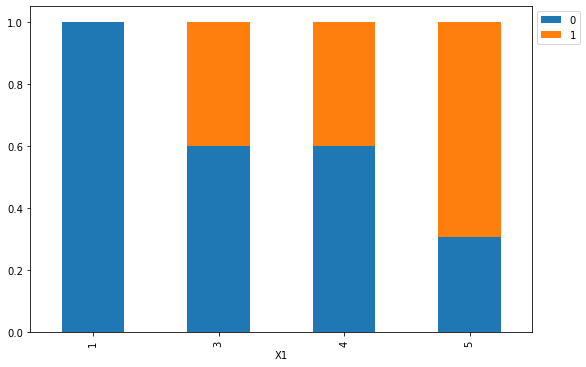

In [19]:
stacked_barplot(df,"X1","Y")

- As rating for delivery on time increases, trend of number of customers happy increases

### Distribution of Y in X2

Y     0   1  All
X2              
All  57  69  126
3    19  23   42
1    13  14   27
2    13  21   34
4    10   7   17
5     2   4    6
------------------------------------------------------------------------------------------------------------------------


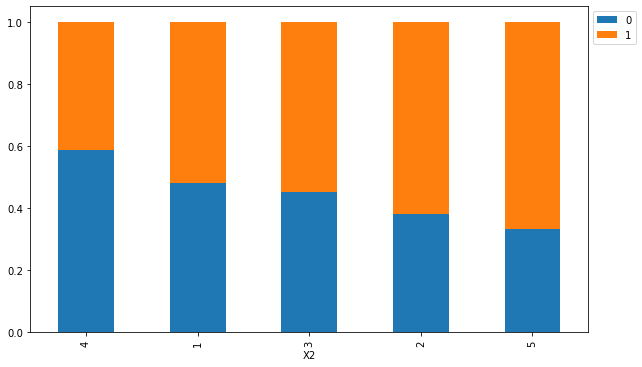

In [20]:
stacked_barplot(df,"X2","Y")

- Hard to see a trend here with rating for contends of order being what was expected.
- Customer satisfaction increases from rating 1 to 2, then decreases from rating 2 to 4 and then increases again at rating 5. Might cause skewing of predictions.

### Distribution of Y in X3

Y     0   1  All
X3              
All  57  69  126
3    29  26   55
4    11  22   33
2     7   7   14
5     6  11   17
1     4   3    7
------------------------------------------------------------------------------------------------------------------------


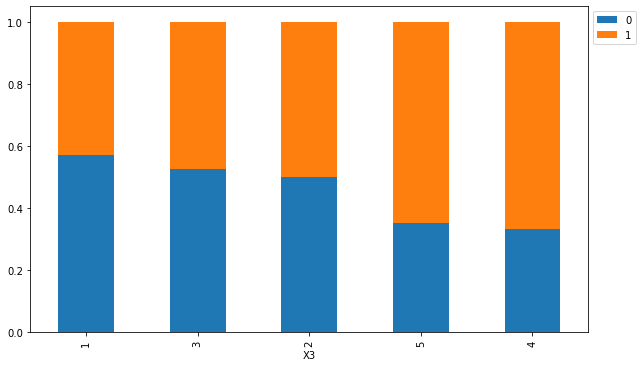

In [21]:
stacked_barplot(df,"X3","Y")

- In regards to customers ordering everything they want to order, number of customers happy tends to increase as  rating increases, with only a slight decrease from ratings 2 to 3 before the trend continues. 

### Distribution of Y in X4

Y     0   1  All
X4              
All  57  69  126
4    23  30   53
3    20  21   41
5    10  15   25
2     4   1    5
1     0   2    2
------------------------------------------------------------------------------------------------------------------------


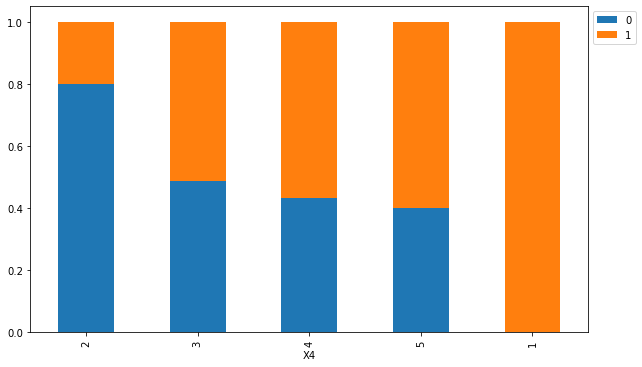

In [22]:
stacked_barplot(df,"X4","Y")

- As customer rating increases, number of customers happy increases regarding paying a good price for order.  The 1 rating is an outlier as there is too little data in that group to make an accurate prediction

### Distribution of Y in X5

Y     0   1  All
X5              
All  57  69  126
4    22  28   50
3    12  10   22
2     9   7   16
5     9  22   31
1     5   2    7
------------------------------------------------------------------------------------------------------------------------


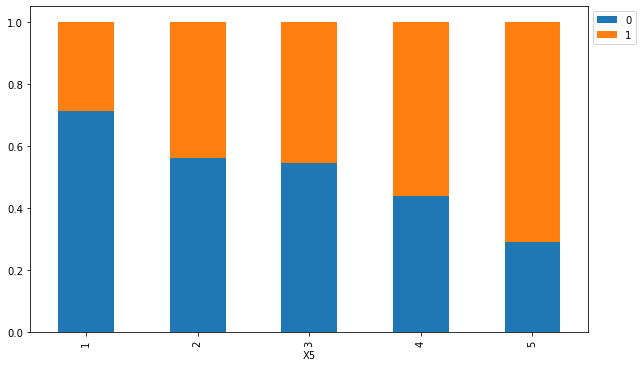

In [23]:
stacked_barplot(df,"X5","Y")

- As customer rating increases regarding satisfaction of courier, number of customers happy tends to increase

### Distribution of Y in X6

Y     0   1  All
X6              
All  57  69  126
5    22  35   57
4    20  27   47
3    14   6   20
2     1   0    1
1     0   1    1
------------------------------------------------------------------------------------------------------------------------


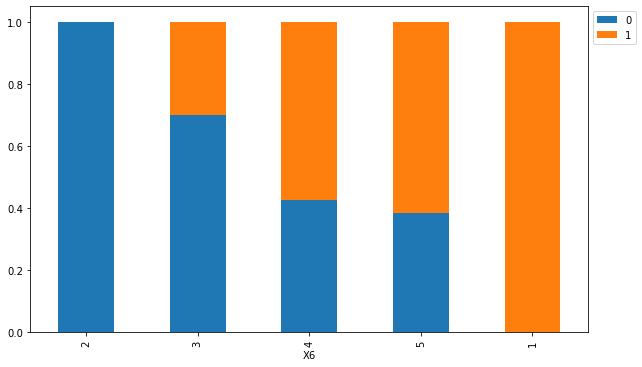

In [24]:
stacked_barplot(df,"X6","Y")

- ratings 1 and 2 have very little data, skewing the predictions, otherwise as customer rating increases for ease of app use to order the number of customers happy tends to increase

### Summary of EDA
#### Data Description:
* All datatypes are categorICAL
* Dependent variable is Y which is a category

#### Data Cleaning:
* No Missing Values

### Observations from EDA
* Across most data groups, as rating increases so does customer satisfaction
* There is very little data in the dataset which skews what ratings accurately tend to increase customer satisfaction, there is a high chance this will skew models ability to predict
    * There is alot of variability in Y distributions across the data because of the lack of data volume, this will skew model ability to train properly, feature engineering is required

## Data preparation for modeling

### Feature engineering

In [57]:
X = df.drop("Y", axis=1)
y = df["Y"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(88, 6) (38, 6)


- While i'd normally prefer to have a train, test and validation set, the volume of data makes it difficult to do so while not having adverse effects on the models

In [62]:
# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder(handle_unknown='ignore')
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [63]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_eval_fs, X_eval_fs, eval_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Feature 0: 2.383126
Feature 1: 0.921990
Feature 2: 0.078748
Feature 3: 0.118048
Feature 4: 2.309648
Feature 5: 1.557108


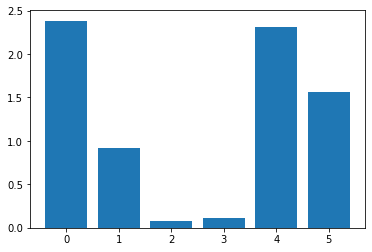

In [64]:
for i in range(len(eval_fs.scores_)):
 print('Feature %d: %f' % (i, eval_fs.scores_[i]))
plt.bar([i for i in range(len(eval_fs.scores_))], eval_fs.scores_)
plt.show()

- According to the chi2 method of feature selection, Feature 3 is least relevant feature for the model
- Based on the closeness of the feature scores for other features, we will be selecting the top 4 features (k=5)

In [65]:
def select_no_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k=4)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [66]:
X_train_fs, X_test_fs, fs = select_no_features(X_train_enc, y_train_enc, X_test_enc)

## Model Building

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [70]:
lr = LogisticRegression()
lr.fit(X_train_fs, y_train_enc)

LogisticRegression()

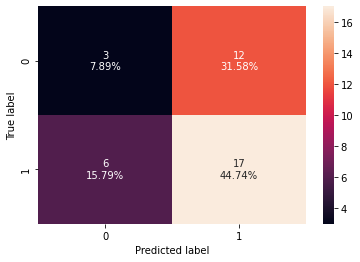

In [74]:
confusion_matrix_sklearn(lr, X_test_fs,y_test_enc)

In [72]:
lr_train_score=model_performance_classification_sklearn(lr, X_train_fs, y_train_enc)
print("Training performance \n",lr_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.590909  0.673913   0.596154  0.632653


In [73]:
lr_test_score=model_performance_classification_sklearn(lr, X_test_fs,y_test_enc)
print("Testing performance \n",lr_test_score)

Test performance 
    Accuracy   Recall  Precision        F1
0  0.526316  0.73913   0.586207  0.653846


- Accuracy is 52% on test set, values are relatively similar in both sets indicating a lack of overfitting

### Decision Tree

In [75]:
dtree = DecisionTreeClassifier(criterion='gini',)
dtree.fit(X_train_fs, y_train_enc)

DecisionTreeClassifier()

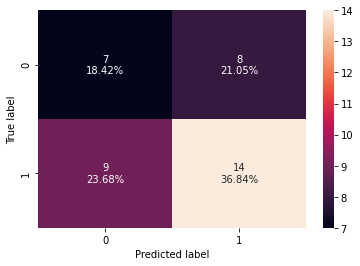

In [76]:
confusion_matrix_sklearn(dtree, X_test_fs,y_test_enc)

In [77]:
dtree_train_score=model_performance_classification_sklearn(dtree, X_train_fs, y_train_enc)
print("Training performance \n",dtree_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.886364  0.847826   0.928571  0.886364


In [78]:
dtree_test_score=model_performance_classification_sklearn(dtree, X_test_fs,y_test_enc)
print("Testing performance \n",dtree_test_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.552632  0.608696   0.636364  0.622222


- Clear overfitting in the training data,  Test set performed better than Logistic regression

### Bagging

In [79]:
bagging = BaggingClassifier()
bagging.fit(X_train_fs, y_train_enc)

BaggingClassifier()

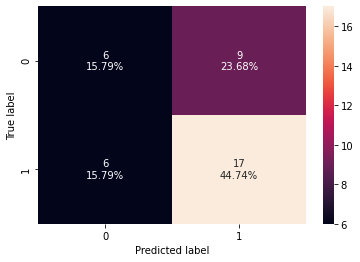

In [83]:
confusion_matrix_sklearn(bagging, X_test_fs,y_test_enc)

In [80]:
bagging_train_score=model_performance_classification_sklearn(bagging, X_train_fs, y_train_enc)
print("Training performance \n",bagging_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0     0.875  0.913043   0.857143  0.884211


In [81]:
bagging_test_score=model_performance_classification_sklearn(bagging, X_test_fs,y_test_enc)
print("Testing performance \n",bagging_test_score)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.605263  0.73913   0.653846  0.693878


- Clear overfitting in the training data,  Test set performed better than Decision tree

### ADABoost

In [84]:
abc = AdaBoostClassifier()
abc.fit(X_train_fs, y_train_enc)

AdaBoostClassifier()

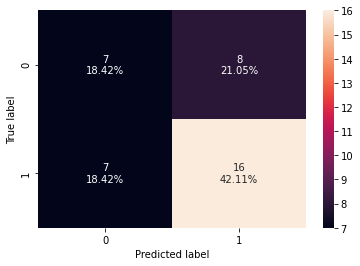

In [85]:
confusion_matrix_sklearn(abc, X_test_fs,y_test_enc)

In [87]:
abc_train_score= model_performance_classification_sklearn(abc, X_train_fs, y_train_enc)
print("Training performance \n",abc_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.636364  0.630435   0.659091  0.644444


In [88]:
abc_test_score= model_performance_classification_sklearn(abc,  X_test_fs,y_test_enc)
print("Testing performance \n",abc_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.605263  0.695652   0.666667  0.680851


- Accuracy is 60% on test set, values are relatively similar in both sets indicating a lack of overfitting.

### Gradient Boost

In [90]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_fs, y_train_enc)

GradientBoostingClassifier()

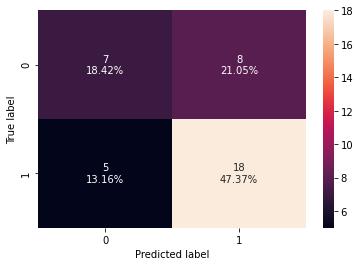

In [91]:
confusion_matrix_sklearn(gbc, X_test_fs,y_test_enc)

In [92]:
gbc_train_score= model_performance_classification_sklearn(gbc, X_train_fs, y_train_enc)
print("Training performance \n",gbc_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0     0.875  0.934783   0.843137  0.886598


In [93]:
gbc_test_score= model_performance_classification_sklearn(gbc,  X_test_fs,y_test_enc)
print("Testing performance \n",gbc_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.657895  0.782609   0.692308  0.734694


- Clear overfitting in the training data,  Test set performed best so far with 65% accuracy

### XGBoost

In [94]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_fs, y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

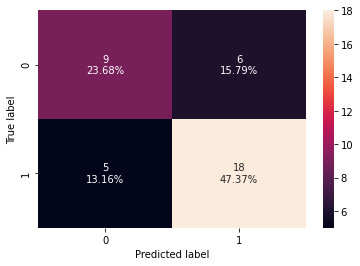

In [95]:
confusion_matrix_sklearn(xgb,X_test_fs,y_test_enc)

In [96]:
xgb_train_score= model_performance_classification_sklearn(xgb, X_train_fs, y_train_enc)
print("Training performance \n",xgb_train_score)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.863636  0.891304   0.854167  0.87234


In [97]:
xgb_test_score= model_performance_classification_sklearn(xgb,  X_test_fs,y_test_enc)
print("Testing performance \n",xgb_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.710526  0.782609       0.75  0.765957


- While overfitting also occurs in this model, so far is has the best test accuracy at 71%

## Oversampling with smote

In [98]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5,
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train_fs, y_train_enc)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 46
Before UpSampling, counts of label 'No': 42 

After UpSampling, counts of label 'Yes': 46
After UpSampling, counts of label 'No': 46 

After UpSampling, the shape of train_X: (92, 4)
After UpSampling, the shape of train_y: (92,) 



### Logistic regression over sampling

In [99]:
log_reg_over = LogisticRegression()

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression()

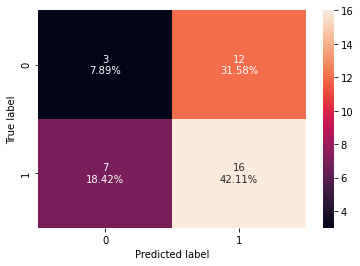

In [100]:
confusion_matrix_sklearn(log_reg_over, X_test_fs,y_test_enc)

In [101]:
lr_over_train_score = model_performance_classification_sklearn(log_reg_over, X_train_over, y_train_over)
print("Training performance \n",lr_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.597826  0.630435   0.591837  0.610526


In [102]:
lr_over_test_score = model_performance_classification_sklearn(log_reg_over, X_test_fs,y_test_enc)
print("Testing performance \n",lr_over_test_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.5  0.695652   0.571429  0.627451


- While training performance was similar to non-SMOTE data, Testing performance declined

### Decision Tree Oversampling

In [103]:
dtree_over = DecisionTreeClassifier(criterion='gini',)
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

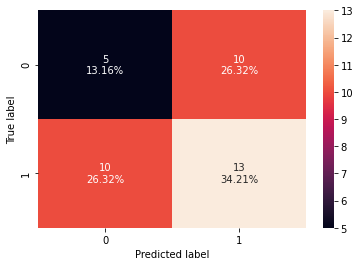

In [104]:
confusion_matrix_sklearn(dtree_over, X_test_fs,y_test_enc)

In [105]:
dtree_over_train_score = model_performance_classification_sklearn(dtree_over, X_train_over, y_train_over)
print("Training performance \n",dtree_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.891304  0.847826   0.928571  0.886364


In [106]:
dtree_over_test_score = model_performance_classification_sklearn(dtree_over, X_test_fs,y_test_enc)
print("Testing performance \n",dtree_over_test_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.473684  0.565217   0.565217  0.565217


- While training performance was similar to non-SMOTE data, Testing performance declined

###  Bagging Oversampling

In [108]:
bagging_over = BaggingClassifier()
bagging_over.fit(X_train_over,y_train_over)

BaggingClassifier()

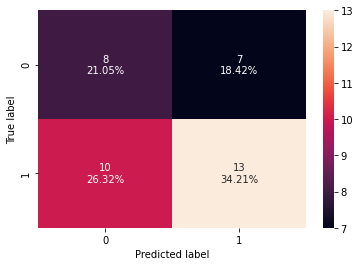

In [109]:
confusion_matrix_sklearn(bagging_over, X_test_fs,y_test_enc)

In [110]:
bagging_over_train_score = model_performance_classification_sklearn(bagging_over, X_train_over, y_train_over)
print("Training performance \n",bagging_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.869565  0.804348      0.925  0.860465


In [111]:
bagging_over_test_score = model_performance_classification_sklearn(bagging_over, X_test_fs,y_test_enc)
print("Testing performance \n",bagging_over_test_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.552632  0.565217       0.65  0.604651


- While training performance was similar to non-SMOTE data, Testing performance declined

### Adaboost Oversample

In [113]:
abc_over = AdaBoostClassifier()
abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier()

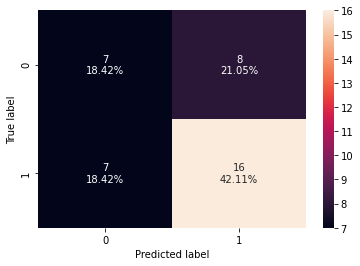

In [114]:
confusion_matrix_sklearn(abc_over, X_test_fs,y_test_enc)

In [115]:
abc_over_train_score = model_performance_classification_sklearn(abc_over, X_train_over, y_train_over)
print("Training performance \n",abc_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.641304  0.630435   0.644444  0.637363


In [116]:
abc_over_test_score = model_performance_classification_sklearn(abc_over, X_test_fs,y_test_enc)
print("Testing performance \n",abc_over_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.605263  0.695652   0.666667  0.680851


- Both testing and training sets performed similarly to non-SMOTE data indicating a lack of overfitting.

### GradientBoost Oversampling

In [117]:
gbc_over = GradientBoostingClassifier()
gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier()

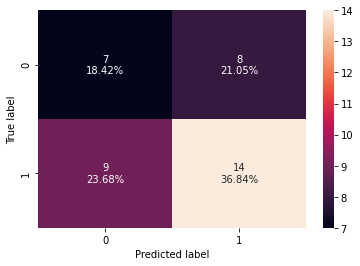

In [118]:
confusion_matrix_sklearn(gbc_over, X_test_fs,y_test_enc)

In [119]:
gbc_over_train_score = model_performance_classification_sklearn(gbc_over, X_train_over, y_train_over)
print("Training performance \n",gbc_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.869565  0.869565   0.869565  0.869565


In [120]:
gbc_over_test_score = model_performance_classification_sklearn(gbc_over, X_test_fs,y_test_enc)
print("Testing performance \n",gbc_over_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.552632  0.608696   0.636364  0.622222


- While training performance was similar to non-SMOTE data, Testing performance declined considerably

### XGB Oversampling

In [122]:
xgb_over = XGBClassifier(eval_metric='logloss')
xgb_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

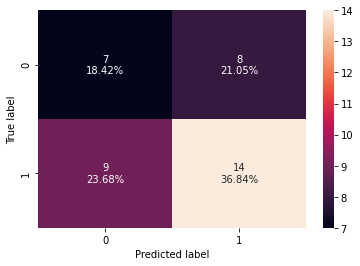

In [123]:
confusion_matrix_sklearn(gbc_over, X_test_fs,y_test_enc)

In [124]:
xgb_over_train_score = model_performance_classification_sklearn(xgb_over, X_train_over, y_train_over)
print("Training performance \n",xgb_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.858696  0.804348   0.902439  0.850575


In [125]:
xgb_over_test_score = model_performance_classification_sklearn(xgb_over, X_test_fs,y_test_enc)
print("Validation performance \n",xgb_over_test_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.578947  0.608696   0.666667  0.636364


- While training performance was similar to non-SMOTE data, Testing performance declined considerably

### Undersampling using Random Undersampler

In [127]:
rus = RandomUnderSampler()
X_train_un, y_train_un = rus.fit_resample(X_train_fs, y_train_enc)

In [128]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes' {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 46
Before Under Sampling, counts of label 'No': 42 

After Under Sampling, counts of label 'Yes' 42
After Under Sampling, counts of label 'No': 42 

After Under Sampling, the shape of train_X: (84, 4)
After Under Sampling, the shape of train_y: (84,) 



### Logistic Regression Under Sampling

In [129]:
lr_un = LogisticRegression()
lr_un.fit(X_train_un,y_train_un)

LogisticRegression()

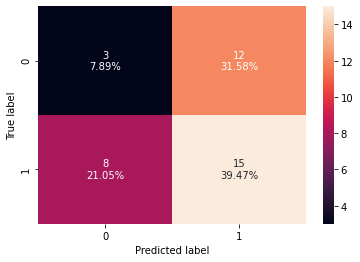

In [130]:
confusion_matrix_sklearn(lr_un, X_test_fs,y_test_enc)

In [131]:
lr_un_train_score = model_performance_classification_sklearn(lr_un, X_train_un, y_train_un)
print("Training performance \n",lr_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.619048  0.619048


In [132]:
lr_under_test_score = model_performance_classification_sklearn(lr_un, X_test_fs,y_test_enc)
print("Testing performance \n",lr_under_test_score)

Testing performance 
    Accuracy    Recall  Precision   F1
0  0.473684  0.652174   0.555556  0.6


- While training performance increased from non-undersampled data, testing performance decreased

### Decision Tree under sampling

In [133]:
dtree_un = DecisionTreeClassifier(criterion = "gini")
dtree_un.fit(X_train_un,y_train_un)

DecisionTreeClassifier()

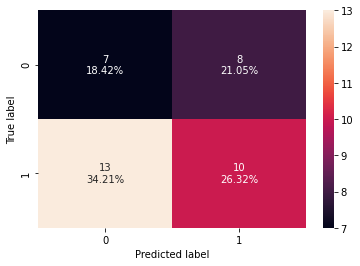

In [134]:
confusion_matrix_sklearn(dtree_un, X_test_fs,y_test_enc)

In [135]:
dtree_un_train_score = model_performance_classification_sklearn(dtree_un, X_train_un, y_train_un)
print("Training performance \n",dtree_un_train_score)

Training performance 
    Accuracy    Recall  Precision   F1
0  0.904762  0.857143   0.947368  0.9


In [136]:
dtree_under_test_score = model_performance_classification_sklearn(dtree_un, X_test_fs,y_test_enc)
print("Testing performance \n",dtree_under_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.447368  0.434783   0.555556  0.487805


- While training performance increased from non-undersampled data, testing performance decreased

### Bagging under sampling

In [138]:
bagging_un = BaggingClassifier()
bagging_un.fit(X_train_un,y_train_un)

BaggingClassifier()

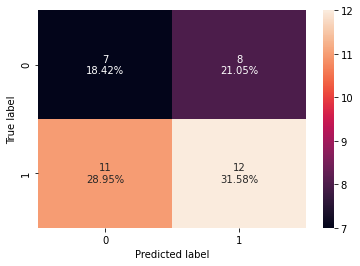

In [139]:
confusion_matrix_sklearn(bagging_un, X_test_fs,y_test_enc)

In [140]:
bagging_un_train_score = model_performance_classification_sklearn(bagging_un, X_train_un, y_train_un)
print("Training performance \n",bagging_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.892857  0.833333   0.945946  0.886076


In [148]:
bagging_under_test_score = model_performance_classification_sklearn(bagging_un, X_test_fs,y_test_enc)
print("Testing performance \n",bagging_under_test_score)

Testing performance 
    Accuracy    Recall  Precision       F1
0       0.5  0.521739        0.6  0.55814


- While training performance increased from non-undersampled data, testing performance decreased

### ADABoost under sampling

In [143]:
abc_un = AdaBoostClassifier()
abc_un.fit(X_train_un,y_train_un)

AdaBoostClassifier()

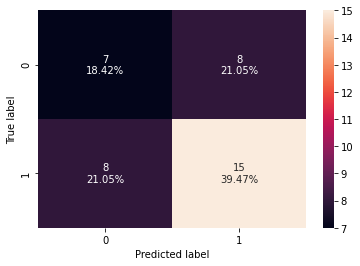

In [149]:
confusion_matrix_sklearn(abc_un, X_test_fs,y_test_enc)

In [145]:
abc_un_train_score = model_performance_classification_sklearn(abc_un, X_train_un, y_train_un)
print("Training performance \n",abc_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.630952  0.595238   0.641026  0.617284


In [154]:
abc_under_test_score = model_performance_classification_sklearn(abc_un, X_test_fs,y_test_enc)
print("Testing performance \n",abc_under_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.578947  0.652174   0.652174  0.652174


- While training performance was similar to non-undersampled data, testing performance decreased

### GradientBoost under sampling

In [150]:
gbc_un = GradientBoostingClassifier()
gbc_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier()

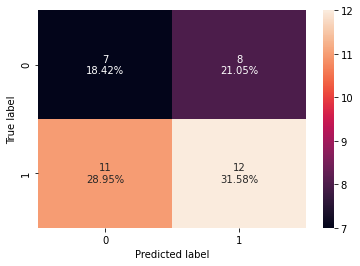

In [151]:
confusion_matrix_sklearn(gbc_un, X_test_fs,y_test_enc)

In [152]:
gbc_un_train_score = model_performance_classification_sklearn(gbc_un, X_train_un, y_train_un)
print("Training performance \n",gbc_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.880952  0.880952   0.880952  0.880952


In [153]:
gbc_under_test_score = model_performance_classification_sklearn(gbc_un, X_test_fs,y_test_enc)
print("Testing performance \n",gbc_under_test_score)

Testing performance 
    Accuracy    Recall  Precision       F1
0       0.5  0.521739        0.6  0.55814


- While training performance increased from non-undersampled data, testing performance decreased

### XGB under sampling

In [155]:
xgb_un = XGBClassifier(eval_metric='logloss')
xgb_un.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

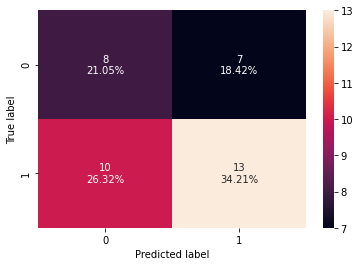

In [156]:
confusion_matrix_sklearn(xgb_un, X_test_fs,y_test_enc)

In [157]:
xgb_un_train_score = model_performance_classification_sklearn(xgb_un, X_train_un, y_train_un)
print("Training performance \n",xgb_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.869048  0.833333   0.897436  0.864198


In [158]:
xgb_under_test_score = model_performance_classification_sklearn(xgb_un, X_test_fs,y_test_enc)
print("Testing performance \n",xgb_under_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.552632  0.565217       0.65  0.604651


- While training performance performed similarly to non-undersampled data, testing performance decreased

## Model Comparison

In [159]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lr_train_score.T,lr_over_train_score.T,lr_un_train_score.T,dtree_train_score.T,dtree_over_train_score.T,dtree_un_train_score.T,
     bagging_train_score.T,bagging_over_train_score.T,bagging_un_train_score.T,abc_train_score.T,abc_over_train_score.T,abc_un_train_score.T,
     gbc_train_score.T,gbc_over_train_score.T,gbc_un_train_score.T,xgb_train_score.T,xgb_over_train_score.T,xgb_un_train_score.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversample",
    "Logistic Regression Undersample",
    "Decision Tree Classifier",
    "Decision Tree Oversample",
    "Decision Tree Undersample",
    "Bagging Classifier",
    "Bagging Oversample",
    "Bagging Undersample",
    "AdaBoost Classifier",
    "AdaBoost Oversample",
    "AdaBoost Undersample",
    "Gradient Boost Classifier",
    "Gradient Boost Oversample",
    "Gradient Boost Undersample",
    "XGB Classifier",
    "XGB Oversample",
    "XGB Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression Oversample,Logistic Regression Undersample,Decision Tree Classifier,Decision Tree Oversample,Decision Tree Undersample,Bagging Classifier,Bagging Oversample,Bagging Undersample,AdaBoost Classifier,AdaBoost Oversample,AdaBoost Undersample,Gradient Boost Classifier,Gradient Boost Oversample,Gradient Boost Undersample,XGB Classifier,XGB Oversample,XGB Undersample
Accuracy,0.590909,0.597826,0.619048,0.886364,0.891304,0.904762,0.875000,0.869565,0.892857,0.636364,0.641304,0.630952,0.875000,0.869565,0.880952,0.863636,0.858696,0.869048
Recall,0.673913,0.630435,0.619048,0.847826,0.847826,0.857143,0.913043,0.804348,0.833333,0.630435,0.630435,0.595238,0.934783,0.869565,0.880952,0.891304,0.804348,0.833333
Precision,0.596154,0.591837,0.619048,0.928571,0.928571,0.947368,0.857143,0.925000,0.945946,0.659091,0.644444,0.641026,0.843137,0.869565,0.880952,0.854167,0.902439,0.897436
F1,0.632653,0.610526,0.619048,0.886364,0.886364,0.900000,0.884211,0.860465,0.886076,0.644444,0.637363,0.617284,0.886598,0.869565,0.880952,0.872340,0.850575,0.864198


- Among the models, for training performance the best performing model was the Decision tree using undersampled data returning an accuracy of 90.4%, this is followed by Bagging with undersampled data giving 89.2% accuracy and in third is Gradient Boost with undersampled data at 88.1%

In [165]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [lr_test_score.T,lr_over_test_score.T,lr_under_test_score.T,dtree_test_score.T,dtree_over_test_score.T,dtree_under_test_score.T,
     bagging_test_score.T,bagging_over_test_score.T,bagging_under_test_score.T,abc_test_score.T,abc_over_test_score.T,abc_under_test_score.T,
     gbc_test_score.T,gbc_over_test_score.T,gbc_under_test_score.T,xgb_test_score.T,xgb_over_test_score.T,xgb_under_test_score.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversample",
    "Logistic Regression Undersample",
    "Decision Tree Classifier",
    "Decision Tree Oversample",
    "Decision Tree Undersample",
    "Bagging Classifier",
    "Bagging Oversample",
    "Bagging Undersample",
    "AdaBoost Classifier",
    "AdaBoost Oversample",
    "AdaBoost Undersample",
    "Gradient Boost Classifier",
    "Gradient Boost Oversample",
    "Gradient Boost Undersample",
    "XGB Classifier",
    "XGB Oversample",
    "XGB Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Logistic Regression Oversample,Logistic Regression Undersample,Decision Tree Classifier,Decision Tree Oversample,Decision Tree Undersample,Bagging Classifier,Bagging Oversample,Bagging Undersample,AdaBoost Classifier,AdaBoost Oversample,AdaBoost Undersample,Gradient Boost Classifier,Gradient Boost Oversample,Gradient Boost Undersample,XGB Classifier,XGB Oversample,XGB Undersample
Accuracy,0.526316,0.500000,0.473684,0.552632,0.473684,0.447368,0.605263,0.552632,0.500000,0.605263,0.605263,0.578947,0.657895,0.552632,0.500000,0.710526,0.578947,0.552632
Recall,0.739130,0.695652,0.652174,0.608696,0.565217,0.434783,0.739130,0.565217,0.521739,0.695652,0.695652,0.652174,0.782609,0.608696,0.521739,0.782609,0.608696,0.565217
Precision,0.586207,0.571429,0.555556,0.636364,0.565217,0.555556,0.653846,0.650000,0.600000,0.666667,0.666667,0.652174,0.692308,0.636364,0.600000,0.750000,0.666667,0.650000
F1,0.653846,0.627451,0.600000,0.622222,0.565217,0.487805,0.693878,0.604651,0.558140,0.680851,0.680851,0.652174,0.734694,0.622222,0.558140,0.765957,0.636364,0.604651


- Among the models, for testing performance the best performing model was the XGBoost with regular data returning an accuracy of 71%, this is followed by Gradient Boost with regular data giving 65.7% accuracy and in third is AdaBoost with regular data at 60.5%

- Seeing as these models performed best on the testing data, we will use gridsearch and randomsearch in order to tune the hyperparamters to get more accurate models. 

## Model Tuning

- Before we start tuning models, it is important to note that the lack of large amounts of data poses a problem for getting general purpose models, because of this, models will be tuned according to all the data without using training and testing sets.

### AdaBoost Classifier

#### GridSearchCV

In [166]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=10, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X, y)

abc_tuned1  = grid_cv.best_estimator_
abc_tuned1.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'learning_rate': 0.01, 'n_estimators': 10} 
Score: 0.6519230769230769
Wall time: 26.3 s


In [167]:
abc_tuned1_train_score = model_performance_classification_sklearn(abc_tuned1, X_train_fs, y_train_enc)
print("Training performance \n",abc_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.659091  0.630435   0.690476  0.659091


In [168]:
abc_tuned1_test_score = model_performance_classification_sklearn(abc_tuned1, X_test_fs,y_test_enc)
print("Testing performance \n",abc_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.631579  0.695652   0.695652  0.695652


#### RandomizedsearchCV

In [174]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=10, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X, y)

abc_tuned2  = grid_cv.best_estimator_
abc_tuned2.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'n_estimators': 30, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} 
Score: 0.5967948717948717
Wall time: 1.01 s


In [175]:
abc_tuned2_train_score = model_performance_classification_sklearn(abc_tuned2, X_train_fs, y_train_enc)
print("Training performance \n",abc_tuned2_train_score)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.670455  0.73913   0.666667  0.701031


In [176]:
abc_tuned2_test_score = model_performance_classification_sklearn(abc_tuned2, X_test_fs,y_test_enc)
print("Testing performance \n",abc_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.578947  0.782609    0.62069  0.692308


### GradientBoost Classifier

#### GridSearchCV

In [177]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=10, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X, y)

gbc_tuned1  = grid_cv.best_estimator_
gbc_tuned1.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'max_features': 0.7, 'n_estimators': 50, 'subsample': 0.8} 
Score: 0.5801282051282052
Wall time: 5.58 s


In [179]:
gbc_tuned1_train_score = model_performance_classification_sklearn(gbc_tuned1, X_train_fs, y_train_enc)
print("Training performance \n",gbc_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.784091  0.934783   0.728814  0.819048


In [180]:
gbc_tuned1_test_score = model_performance_classification_sklearn(gbc_tuned1, X_test_fs,y_test_enc)
print("Testing performance \n",gbc_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision    F1
0  0.684211  0.826087   0.703704  0.76


#### RandomizedsearchCV

In [186]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=10, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X, y)

gbc_tuned2  = grid_cv.best_estimator_
gbc_tuned2.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'subsample': 1, 'n_estimators': 100, 'max_features': 0.7} 
Score: 0.6523809523809523
Wall time: 8.22 s


In [187]:
gbc_tuned2_train_score = model_performance_classification_sklearn(gbc_tuned2,X_train_fs, y_train_enc)
print("Training performance \n",gbc_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.840909  0.869565   0.833333  0.851064


In [188]:
gbc_tuned2_test_score = model_performance_classification_sklearn(gbc_tuned2, X_test_fs,y_test_enc)
print("Testing performance \n",gbc_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision    F1
0  0.684211  0.826087   0.703704  0.76


### XGBoost Classifier

#### GridSearchCV

- Because of How XGboost functions, in order to do a Gridsearch The X dataset needs to be changed into one-hot encoding.

In [218]:
X_xgb = df.drop("Y", axis=1)
X_xgb = pd.get_dummies(X_xgb)
y_xgb = df["Y"]


In [228]:
%%time 

#defining model
model = XGBClassifier(eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=10)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_xgb,y_xgb)

xgb_tuned1  = grid_cv.best_estimator_
xgb_tuned1.fit(X_train_fs, y_train_enc)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 1} with CV score=0.6192307692307693:
Wall time: 22min 6s


In [231]:
xgb_tuned1_train_score = model_performance_classification_sklearn(
    xgb_tuned1, X_train_fs, y_train_enc)

print("Training performance \n",xgb_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.636364  0.978261   0.592105  0.737705


In [232]:
xgb_tuned1_test_score = model_performance_classification_sklearn(xgb_tuned1, X_test_fs,y_test_enc)
print("Testing performance \n",xgb_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.631579  0.956522   0.628571  0.758621


#### RandomizedsearchCV

In [224]:
%%time

# defining model
model = XGBClassifier(eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_xgb,y_xgb)

xgb_tuned2  = grid_cv.best_estimator_
xgb_tuned2.fit(X_train_fs, y_train_enc)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.6102564102564102:
Wall time: 15.7 s


In [227]:
xgb_tuned2_train_score = model_performance_classification_sklearn(
    xgb_tuned2, X_train_fs, y_train_enc)
print("Training performance \n",xgb_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.636364  0.978261   0.592105  0.737705


In [226]:
xgb_tuned2_test_score = model_performance_classification_sklearn(xgb_tuned2, X_test_fs,y_test_enc)
print("Testing performance \n",xgb_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.631579  0.956522   0.628571  0.758621


### Comparing Tuned Models

In [233]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        abc_tuned1_train_score.T,
        abc_tuned2_train_score.T,
        gbc_tuned1_train_score.T,
        gbc_tuned2_train_score.T,
        xgb_tuned1_train_score.T,
        xgb_tuned2_train_score.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Classifier Tuned with Grid search",
    "AdaBoost Classifier Tuned with Random Search",
    "GradientBoost Classifier Tuned with Grid search",
    "GradientBoost Classifier Tuned with Random Search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Classifier Tuned with Grid search,AdaBoost Classifier Tuned with Random Search,GradientBoost Classifier Tuned with Grid search,GradientBoost Classifier Tuned with Random Search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.659091,0.670455,0.784091,0.840909,0.636364,0.636364
Recall,0.630435,0.739130,0.934783,0.869565,0.978261,0.978261
Precision,0.690476,0.666667,0.728814,0.833333,0.592105,0.592105
F1,0.659091,0.701031,0.819048,0.851064,0.737705,0.737705


- The top 3 accuracy performers on the dataset in order were the RandomsearchGradientBoost, the Gridsearch GradientBoost and The Randomsearch Adaboost

In [234]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        abc_tuned1_test_score.T,
        abc_tuned2_test_score.T,
        gbc_tuned1_test_score.T,
        gbc_tuned2_test_score.T,
        xgb_tuned1_test_score.T,
        xgb_tuned2_test_score.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "AdaBoost Classifier Tuned with Grid search",
    "AdaBoost Classifier Tuned with Random Search",
    "GradientBoost Classifier Tuned with Grid search",
    "GradientBoost Classifier Tuned with Random Search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,AdaBoost Classifier Tuned with Grid search,AdaBoost Classifier Tuned with Random Search,GradientBoost Classifier Tuned with Grid search,GradientBoost Classifier Tuned with Random Search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.631579,0.578947,0.684211,0.684211,0.631579,0.631579
Recall,0.695652,0.782609,0.826087,0.826087,0.956522,0.956522
Precision,0.695652,0.620690,0.703704,0.703704,0.628571,0.628571
F1,0.695652,0.692308,0.760000,0.760000,0.758621,0.758621


- The top 3 accuracy performers on the dataset in order were the Randomsearch GradientBoost, the Gridsearch GradientBoost and The gridsearch XGBoost

## Alternative Train-test split

- As an alternative I will use Kfold validation to try to make the most of the small dataset and see if that improves this at all
- In order to use kfold validation we will need to create encoded datasets of all the data

In [247]:
oe = OrdinalEncoder(handle_unknown='ignore')
oe.fit(X)
le = LabelEncoder()
le.fit(y)
X_enc = oe.transform(X)
y_enc = le.transform(y)

fs = SelectKBest(score_func=chi2, k=4)
fs.fit(X_enc, y_enc)
X_enc_fs = fs.transform(X_enc)

In [248]:
def train_with_kfold(model, X, y, n_splits=10):
    """
    Trains a machine learning model using k-fold cross-validation.

    Parameters:
        - model: a Scikit-learn machine learning model
        - X: the feature matrix
        - y: the target vector
        - n_splits: the number of splits to use for k-fold cross-validation

    Returns:
        - mean_score: the mean accuracy score across all folds
        - scores: the accuracy scores for each fold
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in kfold.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
    mean_score = sum(scores) / len(scores)
    return mean_score, scores

In [249]:
models = [lr,dtree,bagging,abc,gbc,xgb]

In [252]:
for model in models:
    mean_score, score = train_with_kfold(model, X_enc_fs,y_enc )
    print(str(model) + " mean score is " + str(mean_score))

LogisticRegression() mean score is 0.566025641025641
DecisionTreeClassifier() mean score is 0.6282051282051282
BaggingClassifier() mean score is 0.6666666666666666
AdaBoostClassifier() mean score is 0.5339743589743591
GradientBoostingClassifier() mean score is 0.6679487179487179
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None) mean score is 0.6506410256410257


- The top 3 performing models using kfold validation in order are gradient boost with 66.7% bagging with 66%, and XGboost with 65% we will create gridsearches using these models

## Gridsearch using Kfold Validation

### Bagging Gridsearch

In [258]:
%%time 

# defining model
base_estimator = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=base_estimator)

# Parameter grid to pass in GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'base_estimator__max_depth': [3, 5, None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Define kfold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=kfold, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_enc_fs, y_enc)

bagging_tuned3  = grid_cv.best_estimator_
bagging_tuned3.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'base_estimator__max_depth': None, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100} 
Score: 0.6833333333333333
Wall time: 14.2 s


In [266]:
mean_score, score = train_with_kfold(bagging_tuned3, X_test_fs,y_test_enc)
print(str(bagging_tuned3) + " mean score is " + str(mean_score))

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.8,
                  n_estimators=100) mean score is 0.525


- Gridsearch has shown a slight increase in the mean accuracy of the model 

### GradientBoost Gridsearch

In [261]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1,'auto', 'sqrt', None],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Define kfold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=kfold, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X, y)

gbc_tuned3  = grid_cv.best_estimator_
gbc_tuned3.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 0.9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.9} 
Score: 0.6525641025641025
Wall time: 14min 48s


In [268]:
mean_score, score = train_with_kfold(gbc_tuned3, X_test_fs,y_test_enc)
print(str(gbc_tuned3) + " mean score is " + str(mean_score))

GradientBoostingClassifier(learning_rate=0.2, max_features=0.9,
                           min_samples_leaf=2, n_estimators=50, subsample=0.9) mean score is 0.4666666666666667


- Accuracy of the model actually declined after the gridsearch

### XGBoost Gridsearch

In [264]:
%%time 

# defining model
model = XGBClassifier(eval_metric='logloss')

# Parameter grid to pass in GridSearchCV

param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Define kfold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=kfold, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_xgb,y_xgb)

xgb_tuned3  = grid_cv.best_estimator_
xgb_tuned3.fit(X_train_fs, y_train_enc)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.9} 
Score: 0.6346153846153847
Wall time: 11min 34s


In [269]:
mean_score, score = train_with_kfold(xgb_tuned3, X_test_fs,y_test_enc)
print(str(xgb_tuned3) + " mean score is " + str(mean_score))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=2, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None) mean score is 0.575


 ## Picking Best Model and exploring insights

- Based on all the results the best model to use is the GradientBoost Gridsearch non-kfold model which had a test accuracy of 68.4%

In [270]:
explainer = shap.Explainer(gbc_tuned2)
shap_values = explainer(X)

In [271]:
shap.plots.force(shap_values[0])

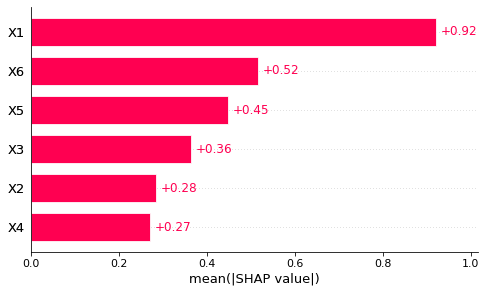

In [272]:
shap.plots.bar(shap_values)

- This suggests that X1 and X6 have more weight to predicition of the model, keeping these ratings high may lead to more happy customers

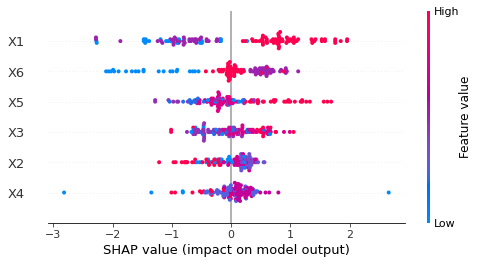

In [273]:
shap.plots.beeswarm(shap_values)

- Features X1 and X5  seem to have higher positive impacts on the model while X6 has a more negative/netural effect on the model. 
- Considering the distribution of X6 this may mean that it has diminishing returns on how happy it makes customers but should the value go down it will have a largely negative effect on customer happiness if not maintained

## Business Recommendations

- More data Collection is needed in order to properly train a data to give general practice prediction results and capabilities.
- Features X3 and X4 were shown to have little effect/be independent from the Y variable. This may indicate that these areas are of little importance to how happy a customer is. However this trend cannot be confirmed as there is too little data and they skew the importance of categories as the distribution from the dataset does not properly correlate to the trend expected to see in real life.
- The model seems to place importance on features X1 and X5, meaning that ensuring the use of good couriers and working on the timing of deliveries so that they arrive on time may lead to more happy customers.
- SHAP suggests that it is important to maintain ease of using the app (feature X6) or else there may be a surge of unhappy customers, while making it easier may not necessarily increase their happiness at this juncture